## A better way to do parameter tuning

### Let's recap the cross-validation way

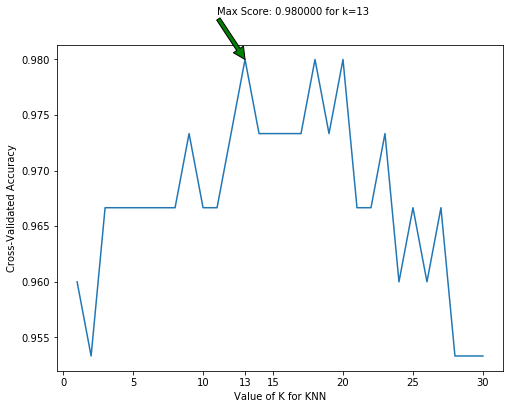

In [52]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

max_score = max(k_scores)
best_k = k_scores.index(max_score)+1
    
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(k_range, k_scores)
ax.set_xlabel('Value of K for KNN')
ax.set_xticks([0, 5, 10, best_k, 15, 20,25,30])
ax.set_ylabel('Cross-Validated Accuracy')
ax.annotate('Max Score: %f for k=%d' %(max_score, best_k), xy=(best_k, max_score), xytext=(best_k - 2, max_score + 0.004),
            arrowprops=dict(facecolor='green'),
            )
plt.show()

### using GridSearch

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors' : k_range
}

# instantiate the grid
grid = GridSearchCV(knn, params, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)

# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [80]:
# view the complete results (list of named tuples)
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[ 0.96        0.95333333  0.96666667  0.96666667  0.96666667  0.96666667
  0.96666667  0.96666667  0.97333333  0.96666667  0.96666667  0.97333333
  0.98        0.97333333  0.97333333  0.97333333  0.97333333  0.98
  0.97333333  0.98        0.96666667  0.96666667  0.97333333  0.96
  0.96666667  0.96        0.96666667  0.95333333  0.95333333  0.95333333]


Text(0,0.5,'Cross-Validated Accuracy')

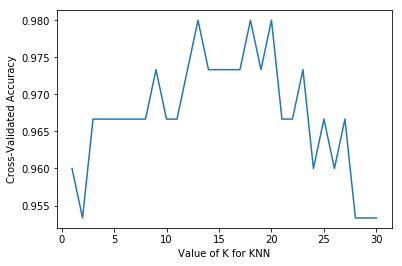

In [81]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [82]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### But we can also search on multpiple parameters simultaneously

In [83]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

params = {
    'n_neighbors' : k_range,
    'weights' : weight_options
}

# instantiate the grid
grid = GridSearchCV(knn, params, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)

# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [84]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Predicting with the best parameters

In [86]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
score1 = knn.predict([[3, 5, 4, 2]])

# GridSearchCV automatically refits the best model using all of the data
score2 = grid.predict([[3, 5, 4, 2]])

print(score1)
print(score2)

[1]
[1]


### Reducing computational load

Doing a complete GridSearch might take a lont time in a large dataset and multiple parameters

In [94]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_neighbors' : k_range,
    'weights' : weight_options
}

# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, params, cv=10, scoring='accuracy', n_iter=10, random_state=5, n_jobs=-1)
rand.fit(X, y)                     

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [95]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [106]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
best_params = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, params, cv=10, scoring='accuracy', n_iter=10, n_jobs=-1)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
    best_params.append(rand.best_params_)

list(zip(best_scores,best_params))

[(0.98, {'n_neighbors': 19, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 15, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 18, 'weights': 'uniform'}),
 (0.98, {'n_neighbors': 19, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 27, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 20, 'weights': 'uniform'}),
 (0.98, {'n_neighbors': 15, 'weights': 'distance'}),
 (0.973, {'n_neighbors': 25, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 20, 'weights': 'uniform'}),
 (0.98, {'n_neighbors': 15, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 17, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 19, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 17, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 27, 'weights': 'distance'}),
 (0.98, {'n_neighbors': 20, 'weights': 'uniform'}),
 (0.98, {'n_neighbors': 13, 'weights': 'uniform'}),
 (0.973, {'n_neighbors': 14, 'weights': 'uniform'}),
 (0.98, {'n_neighbors': 20, 'weights': 'uniform'}),
 (0.98, {'n_neighbors': 18, 'weights': 'uniform'}),